In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
data = pd.read_csv("C:/Users/kmanj/Manjavacas Research/Lew_2016/wise0047_rp_lightcurve.txt",sep=' ',header=None, comment="#")
data

,0,1,2
0,57545.768677,1.021543e-12,2.238771e-15
1,57545.771224,1.022142e-12,2.240582e-15
2,57545.773770,1.021269e-12,2.238520e-15
3,57545.776316,1.022127e-12,2.241971e-15
4,57545.778863,1.024151e-12,2.245980e-15
...,...,...,...
61,57546.109569,9.435823e-13,2.085027e-15
62,57546.112115,9.405443e-13,2.079661e-15
63,57546.114661,9.422597e-13,2.082339e-15
64,57546.117208,9.434389e-13,2.084663e-15


<ErrorbarContainer object of 3 artists>

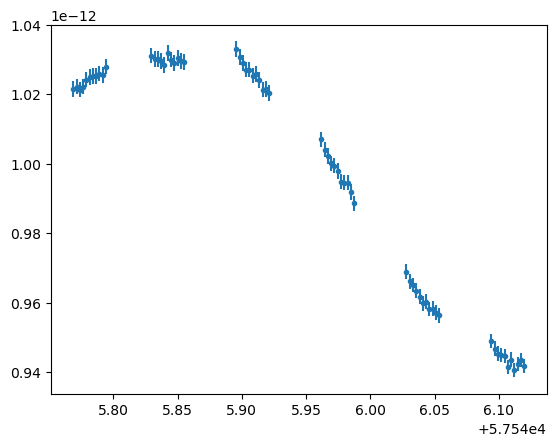

In [3]:
plt.errorbar(x = data[0], y = data[1], xerr = None, yerr = data[2], fmt = '.')

In [4]:
flux = data[1]
a = 0

for i in flux:
    a += i

b = a / len(data[1])

flux_norm = []

for i in flux:
    flux_norm.append( i / b)

Text(0.5, 1.0, '2MASS J00470038+6803543, SpT: L9')

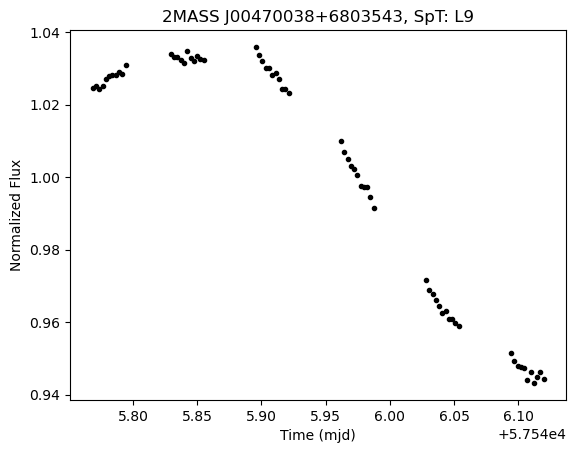

In [5]:
plt.errorbar(x = data[0], y = flux_norm, xerr = None, yerr = data[2], fmt = '.',ls='none', linewidth = 0.2, color = 'black')
plt.xlabel('Time (mjd)')
plt.ylabel('Normalized Flux')
plt.title('2MASS J00470038+6803543, SpT: L9')

In [6]:
Reference = 'Lew et al 2016 ApJL 829 L32'
Telescope = 'Hubble Space Telescope'
Object = '2MASS J00470038+6803543'
SpectralType = 'L9'
Jmag = '15.604 +/- 0.068'
Hmag = '13.968 +/- 0.04'
Kmag = '13.053 +/- 0.029'
RA = 11.75613337463
DEC = 68.06414417626
Instrument = 'HST/WFC3'
Date_obs = ' 2016 June 6'
filter_1 = 'G141 grism'
TSTART = data[0][0]
TSTOP = data[0][len(data[0]) - 1]
dir_save_txt = "C:/Users/kmanj/Manjavacas Research/Lew_2016/1F/"
dir_save_fits = "C:/Users/kmanj/FITS_BD_Files/Data/Lew_2016/"

In [7]:
data[0][0]

57545.76867743

In [8]:
lc = l.LightCurve(time = list(data[0]) * u.d, flux = list(flux_norm) * u.dimensionless_unscaled, flux_err = list(data[2]) * u.dimensionless_unscaled)
lc

time,flux,flux_err
,,
Time,float64,float64
57545.76867743,1.0244561787214175,2.238770567035432e-15
57545.77122372,1.0250573117803128,2.2405822520707108e-15
57545.77377002,1.0241817595898253,2.2385202058193144e-15
57545.77631632,1.0250414325541641,2.2419710176838395e-15
57545.77886261,1.0270716273338762,2.245980449177138e-15
57545.78140891,1.0278370495069278,2.2496546433334226e-15
57545.783955205,1.0280975604634783,2.2488953618840018e-15
57545.7865015,1.028198998303068,2.2492507538802355e-15


<Axes: xlabel='Time [JD]', ylabel='Flux'>

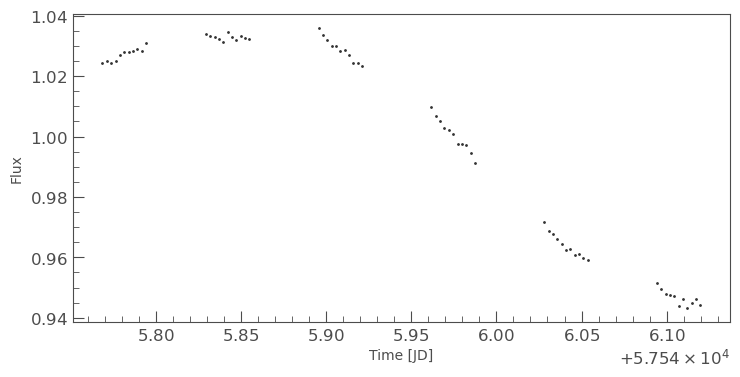

In [10]:
lc.scatter()

In [9]:
lc.to_fits(path = dir_save_fits + '2MASS_J00470038+6803543_Lew2016.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000002676CF3BE80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000002676CF38C70>]

In [11]:
with fits.open(dir_save_fits + '2MASS_J00470038+6803543_Lew2016.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs
    f[0].header['TSTART'] = TSTART
    f[0].header['TSTOP'] = TSTOP
    f[0].header['TIMESYS'] = 'mjd'
    f[0].header['TELESCOP'] = Telescope
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = filter_1
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag
    f[1].header['TUNIT1'] = 'mjd'